In [2]:
import pandas as pd


names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

In [11]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)
names.tail()

,name,sex,births,year
1691891,Zymaire,M,5,2010
1691892,Zyonne,M,5,2010
1691893,Zyquarius,M,5,2010
1691894,Zyran,M,5,2010
1691895,Zzyzx,M,5,2010


In [16]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1899166,2053065
2007,1920231,2072975
2008,1888177,2037309
2009,1834048,1980491
2010,1774186,1915331


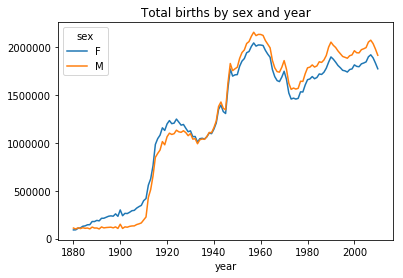

In [17]:
%matplotlib inline
total_births.plot(title='Total births by sex and year')

In [24]:
# 名前・性別・年度別に集計して名前の割合を調べる
def add_prop(group):
    births = group.births
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names.tail()

,name,sex,births,year,prop
1691891,Zymaire,M,5,2010,0.000003
1691892,Zyonne,M,5,2010,0.000003
1691893,Zyquarius,M,5,2010,0.000003
1691894,Zyran,M,5,2010,0.000003
1691895,Zzyzx,M,5,2010,0.000003


In [27]:
# 性別・年度別に合計してちゃんと1になるか調べる
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [84]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False).head(1000)

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)
top1000.tail()

,name,sex,births,year,prop
261872,Simeon,M,196,2010,0.000102
261873,Reuben,M,196,2010,0.000102
261874,Keshawn,M,196,2010,0.000102
261875,Eliezer,M,196,2010,0.000102
261876,Enoch,M,196,2010,0.000102


In [85]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e34680898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8e2e2c69b0>], dtype=object)

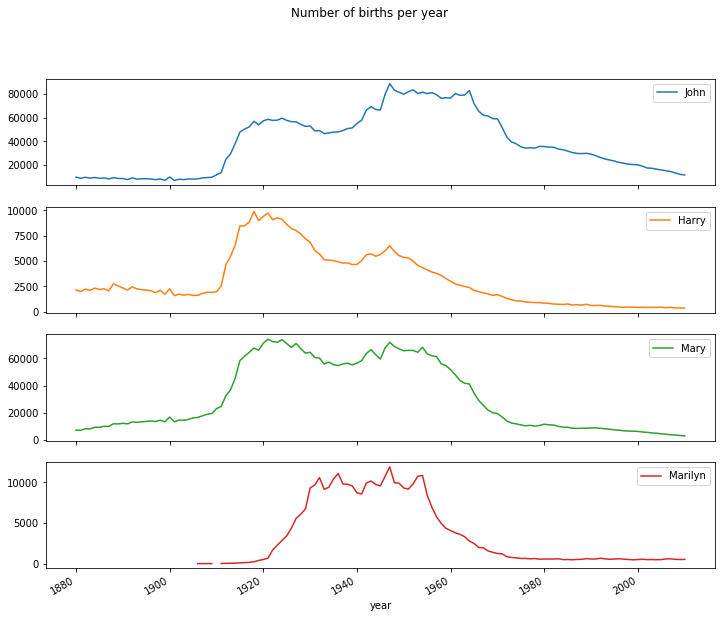

In [86]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')